In [1]:
# import bibliotek 

import numpy as np
import pandas as pd

import xgboost
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

import matplotlib.pyplot as plt

In [2]:
# sprawdzenie jakie sa dane
import os 
for dirname, _, filenames in os.walk('/Users/Chabi/Desktop/santander-customer-transaction-prediction'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/Users/Chabi/Desktop/santander-customer-transaction-prediction/test.csv
/Users/Chabi/Desktop/santander-customer-transaction-prediction/train.csv
/Users/Chabi/Desktop/santander-customer-transaction-prediction/sample_submission.csv


In [3]:
# wczytanie danych trenignowych
input_dir = '/Users/Chabi/Desktop/santander-customer-transaction-prediction'
df_train = pd.read_csv(input_dir + '/train.csv')
df_train.head(5)

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [4]:
# podzial na x i y 
var_columns = [ c for c in df_train.columns if c not in ['ID_code', 'target']]
X = df_train.loc[:, var_columns]
y = df_train.loc[:, 'target']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((160000, 200), (40000, 200), (160000,), (40000,))

In [5]:
# budowanie modelu XGBoost
xgboost.XGBClassifier().get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': True,
 'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'enable_categorical': False,
 'gamma': None,
 'gpu_id': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_delta_step': None,
 'max_depth': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [6]:
model_xgboost = xgboost.XGBClassifier(learning_rate=0.1,
                                     max_depth=5,
                                     n_estimators=5000,
                                     subsample=0.5,
                                     colsample_bytree=0.5,
                                     eval_metric='auc',
                                     verbosity=1)
eval_set = [(X_valid, y_valid)]

model_xgboost.fit(X_train,
                 y_train,
                 early_stopping_rounds=10,
                 eval_set=eval_set,
                 verbose=True)

/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.59331
[1]	validation_0-auc:0.65578
[2]	validation_0-auc:0.68327
[3]	validation_0-auc:0.70249
[4]	validation_0-auc:0.71389
[5]	validation_0-auc:0.71843
[6]	validation_0-auc:0.72614
[7]	validation_0-auc:0.73048
[8]	validation_0-auc:0.73684
[9]	validation_0-auc:0.73864
[10]	validation_0-auc:0.74277
[11]	validation_0-auc:0.74268
[12]	validation_0-auc:0.74532
[13]	validation_0-auc:0.74646
[14]	validation_0-auc:0.74699
[15]	validation_0-auc:0.75239
[16]	validation_0-auc:0.75540
[17]	validation_0-auc:0.75635
[18]	validation_0-auc:0.75868
[19]	validation_0-auc:0.75976
[20]	validation_0-auc:0.76213
[21]	validation_0-auc:0.76675
[22]	validation_0-auc:0.76979
[23]	validation_0-auc:0.77157
[24]	validation_0-auc:0.77567
[25]	validation_0-auc:0.77719
[26]	validation_0-auc:0.78051
[27]	validation_0-auc:0.78220
[28]	validation_0-auc:0.78518
[29]	validation_0-auc:0.78548
[30]	validation_0-auc:0.78663
[31]	validation_0-auc:0.78894
[32]	validation_0-auc:0.79087
[33]	validation_0-au

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5,
              enable_categorical=False, eval_metric='auc', gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=5000, n_jobs=10, num_parallel_tree=1,
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=0.5, tree_method='exact',
              validate_parameters=1, verbosity=1)

In [7]:
# ewaluacja modelu
y_train_pred = model_xgboost.predict_proba(X_train)[:,1]
y_valid_pred = model_xgboost.predict_proba(X_valid)[:,1]

print('AUC Train: {:.4f}\nAUC Valid: {:.4f}'.format(roc_auc_score(y_train, y_train_pred),
                                                   roc_auc_score(y_valid, y_valid_pred)))

AUC Train: 0.9707
AUC Valid: 0.8877


In [8]:
# tuningowanie hyperparametrow
params ={'learning_rate' : [0.02, 0.05, 0.1],
         'max_depth' : [2, 3, 5],
         'n_estimators' : [1000, 2000, 3000]}

num_combinantions = 1
for v in params.values(): num_combinantions *= len(v)
    
print(num_combinantions)
params

27


{'learning_rate': [0.02, 0.05, 0.1],
 'max_depth': [2, 3, 5],
 'n_estimators': [1000, 2000, 3000]}

In [9]:
def my_roc_auc_score(model, X, y):
    return roc_auc_score(y, model.predict_proba(X)[:,1])

model_xgboost_hp = GridSearchCV(estimator=xgboost.XGBClassifier(subsample=0.5,
                                                               colsample_bytree=0.25,
                                                               eval_metric='auc',
                                                               use_label_encoder=False),
                               param_grid=params,
                               cv=2,
                               scoring=my_roc_auc_score,
                               return_train_score=True,
                               verbose=4)
model_xgboost_hp.fit(X, y)

Fitting 2 folds for each of 27 candidates, totalling 54 fits
[CV 1/2] END learning_rate=0.02, max_depth=2, n_estimators=1000;, score=(train=0.879, test=0.854) total time=  34.7s
[CV 2/2] END learning_rate=0.02, max_depth=2, n_estimators=1000;, score=(train=0.876, test=0.860) total time=  34.6s
[CV 1/2] END learning_rate=0.02, max_depth=2, n_estimators=2000;, score=(train=0.907, test=0.877) total time= 1.2min
[CV 2/2] END learning_rate=0.02, max_depth=2, n_estimators=2000;, score=(train=0.903, test=0.883) total time= 1.2min
[CV 1/2] END learning_rate=0.02, max_depth=2, n_estimators=3000;, score=(train=0.918, test=0.886) total time= 1.7min
[CV 2/2] END learning_rate=0.02, max_depth=2, n_estimators=3000;, score=(train=0.915, test=0.891) total time= 1.7min
[CV 1/2] END learning_rate=0.02, max_depth=3, n_estimators=1000;, score=(train=0.908, test=0.868) total time=  50.4s
[CV 2/2] END learning_rate=0.02, max_depth=3, n_estimators=1000;, score=(train=0.904, test=0.874) total time=  48.9s
[CV

GridSearchCV(cv=2,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.25,
                                     enable_categorical=False,
                                     eval_metric='auc', gamma=None, gpu_id=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone...
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                    

In [10]:
# ranking modeli
df_cv_results = pd.DataFrame(model_xgboost_hp.cv_results_)
df_cv_results = df_cv_results[['rank_test_score',
                              'mean_test_score',
                              'mean_train_score',
                              'param_learning_rate',
                              'param_max_depth',
                              'param_n_estimators']]
df_cv_results.sort_values(by='rank_test_score',
                         inplace=True)
df_cv_results

,rank_test_score,mean_test_score,mean_train_score,param_learning_rate,param_max_depth,param_n_estimators
11,1,0.896403,0.936797,0.05,2,3000
13,2,0.894951,0.956784,0.05,3,2000
10,3,0.894720,0.927915,0.05,2,2000
5,4,0.894403,0.943631,0.02,3,3000
14,5,0.894132,0.970116,0.05,3,3000
8,6,0.894116,0.991877,0.02,5,3000
19,7,0.893845,0.942074,0.1,2,2000
7,8,0.893181,0.982164,0.02,5,2000
18,9,0.892659,0.925673,0.1,2,1000
20,10,0.891830,0.954120,0.1,2,3000


Text(0.5, 1.0, 'Performance wrt # of Trees and Depth')

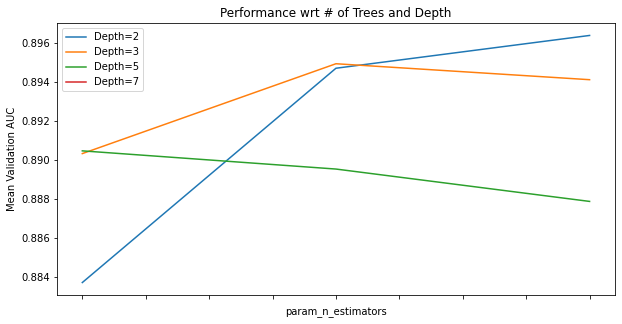

In [11]:
# posortawnie po numerach estymacji na x jak parametr learning rate sie zmienia
df_cv_results.sort_values(by='param_n_estimators', inplace=True)

lr_d2 = df_cv_results.loc[(df_cv_results['param_learning_rate']==0.05) & 
                          (df_cv_results['param_max_depth']==2),:]
lr_d3 = df_cv_results.loc[(df_cv_results['param_learning_rate']==0.05) & 
                          (df_cv_results['param_max_depth']==3),:]
lr_d5 = df_cv_results.loc[(df_cv_results['param_learning_rate']==0.05) & 
                          (df_cv_results['param_max_depth']==5),:]
lr_d7 = df_cv_results.loc[(df_cv_results['param_learning_rate']==0.05) & 
                          (df_cv_results['param_max_depth']==7),:]

fig, ax = plt.subplots(figsize=(10,5))
lr_d2.plot(x='param_n_estimators', y='mean_test_score', label='Depth=2', ax=ax)
lr_d3.plot(x='param_n_estimators', y='mean_test_score', label='Depth=3', ax=ax)
lr_d5.plot(x='param_n_estimators', y='mean_test_score', label='Depth=5', ax=ax)
lr_d7.plot(x='param_n_estimators', y='mean_test_score', label='Depth=7', ax=ax)
plt.ylabel('Mean Validation AUC')
plt.title('Performance wrt # of Trees and Depth')

Text(0.5, 1.0, 'Performance wrt learning rate')

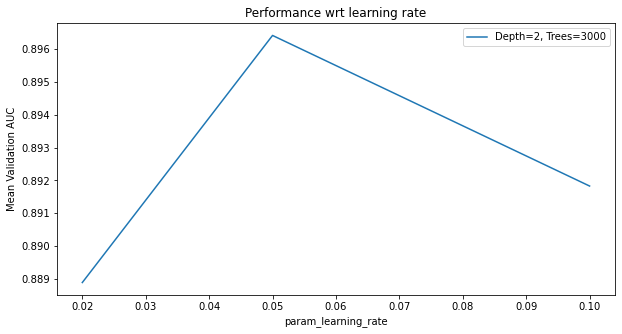

In [12]:
# First sort by learning rate as that would be x-axis
df_cv_results.sort_values(by='param_learning_rate', inplace=True)

lr_t3k_d2 = df_cv_results.loc[(df_cv_results['param_n_estimators']==3000) & 
                              (df_cv_results['param_max_depth']==2),:]

fig, ax = plt.subplots(figsize=(10,5))
lr_t3k_d2.plot(x='param_learning_rate', y='mean_test_score', label='Depth=2, Trees=3000', ax=ax)
plt.ylabel('Mean Validation AUC')
plt.title('Performance wrt learning rate')

In [13]:
# finalowy model najlepszy
model_xgboost_final = xgboost.XGBClassifier(learning_rate = 0.05,
                                            max_depth=2,
                                            n_estimator=5000,
                                            subsample=0.5,
                                            colsample_bytree=0.25,
                                            eval_metric='auc',
                                            verbosity=1,
                                            use_label_encoder=False)

eval_set = [(X_train, y_train), (X_valid, y_valid)]

model_xgboost_final.fit(X_train,
                       y_train,
                       early_stopping_rounds=20,
                       eval_set=eval_set,
                       verbose=True)

[16:40:08] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-auc:0.55072	validation_1-auc:0.55038
[1]	validation_0-auc:0.58269	validation_1-auc:0.58434
[2]	validation_0-auc:0.62260	validation_1-auc:0.62441
[3]	validation_0-auc:0.64763	validation_1-auc:0.65203
[4]	validation_0-auc:0.65660	validation_1-auc:0.66063
[5]	validation_0-auc:0.67424	validation_1-auc:0.67676
[6]	validation_0-auc:0.69687	validation_1-auc:0.69512
[7]	validation_0-auc:0.69248	validation_1-auc:0.69134
[8]	validation_0-auc:0.70361	validation_1-auc:0.70177
[9]	validation_0-auc:0.70528	validation_1-auc:0.70378
[10]	validation_0-auc:0.70737	val

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.25,
              enable_categorical=False, eval_metric='auc', gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimator=5000, n_estimators=100, n_jobs=10,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.5,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, ...)

In [14]:
y_train_pred = model_xgboost_final.predict_proba(X_train)[:,1]
t_train_pred = model_xgboost_final.predict_proba(X_valid)[:,1]

print('AUC Train: {:.4f}\nAUC Valid: {:.4f}'.format(roc_auc_score(y_train, y_train_pred),
                                                   roc_auc_score(y_valid, y_valid_pred)))

AUC Train: 0.7942
AUC Valid: 0.8877


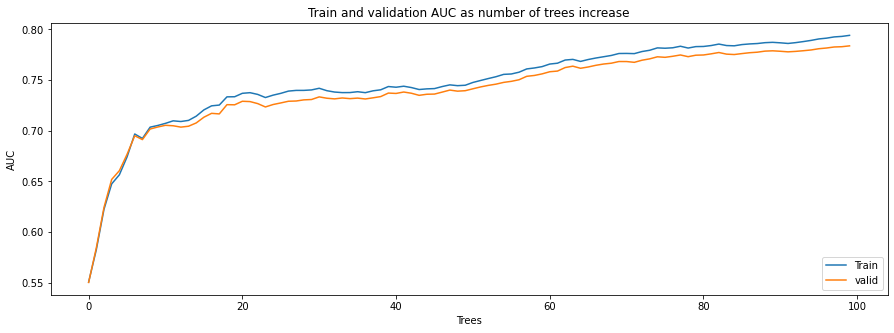

In [15]:
evaluation_results = model_xgboost_final.evals_result()

# Index into each key to find AUC values for training and validation data after each tree
train_auc_tree = evaluation_results['validation_0']['auc']
valid_auc_tree = evaluation_results['validation_1']['auc']


# Plotting Section
plt.figure(figsize=(15,5))

plt.plot(train_auc_tree, label='Train')
plt.plot(valid_auc_tree, label='valid')

plt.title("Train and validation AUC as number of trees increase")
plt.xlabel("Trees")
plt.ylabel("AUC")
plt.legend(loc='lower right')
plt.show()

In [16]:
# istotnosc zmiennych 
df_var_imp = pd.DataFrame({"Variable": var_columns,
                           "Importance": model_xgboost_final.feature_importances_}) \
                        .sort_values(by='Importance', ascending=False)
df_var_imp[:10]

,Variable,Importance
81,var_81,0.044493
191,var_191,0.034090
170,var_170,0.032574
40,var_40,0.032060
190,var_190,0.031120
174,var_174,0.030015
12,var_12,0.029636
133,var_133,0.028946
2,var_2,0.027517
53,var_53,0.027450


In [18]:
# uzycie danych testowych
df_test = pd.read_csv(input_dir + '/test.csv')
df_sample_submissions = pd.read_csv(input_dir + '/sample_submission.csv')
df_test.shape, df_sample_submissions.shape

((200000, 201), (200000, 2))

In [20]:
X_test = df_test.loc[:, var_columns]

df_sample_submissions['target'] = model_xgboost_final.predict_proba(X_test)[:,1]
df_sample_submissions

,ID_code,target
0,test_0,0.129156
1,test_1,0.097898
2,test_2,0.134742
3,test_3,0.087775
4,test_4,0.101950
...,...,...
199995,test_199995,0.080231
199996,test_199996,0.076278
199997,test_199997,0.073436
199998,test_199998,0.120439


In [21]:
output_dir = '/Users/Chabi/Desktop/santander-customer-transaction-prediction/'
df_sample_submissions.to_csv(output_dir + '05_xgboost_scores.csv', index=False)